In [2]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the diagnoses data
diagnoses_path = "Data/diagnoses_icd.csv"
demographics_path = "Data/demographics.csv"

if os.path.exists(diagnoses_path):
    diagnoses_df = pd.read_csv(diagnoses_path)
    print(f"Loaded {len(diagnoses_df)} diagnosis records")
else:
    raise FileNotFoundError(f"Diagnoses file not found at {diagnoses_path}")
    
if os.path.exists(demographics_path):
    demographics_df = pd.read_csv(demographics_path)
    print(f"Loaded {len(demographics_df)} patient demographic records")
else:
    print("Demographics file not found. Will only analyze diagnosis data.")

# Display diagnosis data sample
print("\nSample of diagnosis data:")
diagnoses_df.head()

Loaded 300606 diagnosis records
Loaded 223452 patient demographic records

Sample of diagnosis data:


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


Number of unique patients: 10842
Number of unique ICD codes: 12144

Top 10 most common diagnoses:
icd_code
4019      4793
E785      4093
I10       4042
Z87891    3148
2724      3071
K219      2729
53081     2185
I2510     2030
F329      2016
25000     1984
Name: count, dtype: int64

Diagnoses per patient statistics:
Mean: 27.73
Median: 13.00
Min: 1
Max: 1289


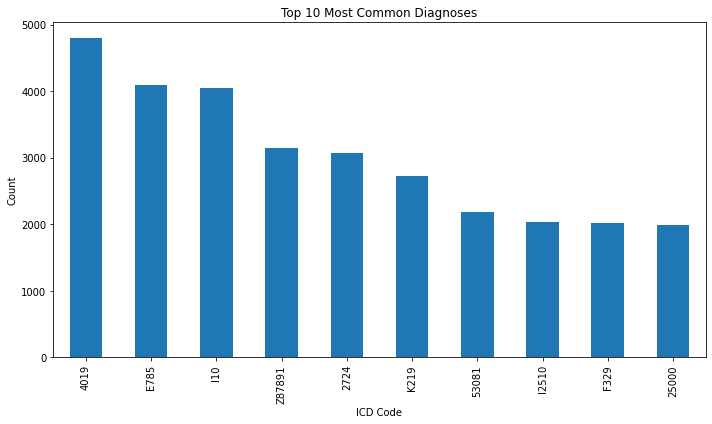

In [4]:
# Basic data exploration
print(f"Number of unique patients: {diagnoses_df['subject_id'].nunique()}")
print(f"Number of unique ICD codes: {diagnoses_df['icd_code'].nunique()}")

# Find the most common diagnoses
top_diagnoses = diagnoses_df['icd_code'].value_counts().head(10)
print("\nTop 10 most common diagnoses:")
print(top_diagnoses)

# Distribution of diagnoses per patient
diagnoses_per_patient = diagnoses_df.groupby('subject_id').size()
print("\nDiagnoses per patient statistics:")
print(f"Mean: {diagnoses_per_patient.mean():.2f}")
print(f"Median: {diagnoses_per_patient.median():.2f}")
print(f"Min: {diagnoses_per_patient.min()}")
print(f"Max: {diagnoses_per_patient.max()}")

# Visualize top diagnoses
plt.figure(figsize=(10, 6))
top_diagnoses.plot(kind='bar')
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('ICD Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [6]:
def filter_excessive_diagnoses(diagnoses_df, max_diagnoses=100):
    """
    Filters out patients with excessive number of diagnoses (likely data entry errors).
    
    Args:
        diagnoses_df: DataFrame with diagnoses data
        max_diagnoses: Maximum number of diagnoses allowed per patient
        
    Returns:
        DataFrame: Filtered diagnoses DataFrame
    """
    # Count diagnoses per patient
    diagnoses_per_patient = diagnoses_df.groupby('subject_id').size()
    
    # Identify patients with excessive diagnoses
    excessive_patients = diagnoses_per_patient[diagnoses_per_patient > max_diagnoses].index
    
    # Report on filtering
    print(f"Filtering out {len(excessive_patients)} patients with more than {max_diagnoses} diagnoses")
    print(f"These patients represent {len(excessive_patients) / diagnoses_df['subject_id'].nunique() * 100:.2f}% of total patients")
    
    # Get total diagnoses for these patients
    excessive_records = diagnoses_df[diagnoses_df['subject_id'].isin(excessive_patients)]
    print(f"Removing {len(excessive_records)} records ({len(excessive_records) / len(diagnoses_df) * 100:.2f}% of all records)")
    
    # Filter out these patients
    filtered_df = diagnoses_df[~diagnoses_df['subject_id'].isin(excessive_patients)]
    
    return filtered_df

filtered_diagnoses_df = filter_excessive_diagnoses(diagnoses_df, max_diagnoses=100)

Filtering out 524 patients with more than 100 diagnoses
These patients represent 4.83% of total patients
Removing 99912 records (33.24% of all records)


In [7]:
from knn_evaluation import analyze_predictive_comorbidities

# Test analyze_predictive_comorbidities function
print("\nTesting improved comorbidity analysis function:")
feature_importance = analyze_predictive_comorbidities(diagnoses_df, "I10")  # Hypertension

# Save results to CSV for further analysis
feature_importance.to_csv("hypertension_comorbidities.csv", index=False)
print("\nResults saved to hypertension_comorbidities.csv")


Testing improved comorbidity analysis function:
Analyzing predictive comorbidities for I10...
Found 2444 patients with I10 diagnosis
Positive cases: 2444, Negative cases: 8398
Feature matrix shape: (10842, 12143)

Top 10 Most Significant Comorbidities:
ICD Code: E785, Chi2: 1976.06, p-value: 0.00000
ICD Code: E119, Chi2: 1054.61, p-value: 0.00000
ICD Code: K219, Chi2: 836.63, p-value: 0.00000
ICD Code: Z87891, Chi2: 833.12, p-value: 0.00000
ICD Code: I2510, Chi2: 563.14, p-value: 0.00000
ICD Code: N179, Chi2: 453.54, p-value: 0.00000
ICD Code: Z7902, Chi2: 439.19, p-value: 0.00000
ICD Code: G4733, Chi2: 419.35, p-value: 0.00000
ICD Code: D62, Chi2: 412.51, p-value: 0.00000
ICD Code: Z7901, Chi2: 377.39, p-value: 0.00000

Prevalence Analysis for Top Comorbidities:
ICD: E785, Target: 0.00%, Non-Target: 0.02%, Ratio: 0.00x
ICD: E119, Target: 0.00%, Non-Target: 0.04%, Ratio: 0.00x
ICD: K219, Target: 0.00%, Non-Target: 0.01%, Ratio: 0.00x
ICD: Z87891, Target: 0.04%, Non-Target: 0.00%, Rati